In [11]:
# 📘 Naive Bayes Balancing (Oversampling & Undersampling)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import CategoricalNB
import matplotlib.pyplot as plt

In [2]:
# 1️⃣ Load dataset
df = pd.read_excel('New_StudentPerformanceFactors.xlsx')
print(f"Jumlah data awal: {df.shape}")


# Tampilkan distribusi target
print("\nDistribusi Exam_Score awal:")
print(df['Exam_Score'].value_counts())

Jumlah data awal: (6608, 20)

Distribusi Exam_Score awal:
Exam_Score
BC    4945
B     1032
C      581
A       29
AB      21
Name: count, dtype: int64


In [3]:
# 2️⃣ Encoding kategorikal


In [4]:
# 3️⃣ Pisahkan fitur dan target
encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le

In [5]:
# 4️⃣ Split data
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
# 5️⃣ Oversampling
sm = SMOTE(random_state=42)
X_over, y_over = sm.fit_resample(X_train, y_train)


model_over = CategoricalNB()
model_over.fit(X_over, y_over)
y_pred_over = model_over.predict(X_test)


print("\n=== Oversampling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_over))
print(classification_report(y_test, y_pred_over))


=== Oversampling ===
Accuracy: 0.6217851739788199
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         4
           2       0.42      0.57      0.48       207
           3       0.84      0.65      0.73       989
           4       0.44      0.57      0.50       116

    accuracy                           0.62      1322
   macro avg       0.34      0.36      0.34      1322
weighted avg       0.74      0.62      0.67      1322



In [7]:
# 6️⃣ Undersampling
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)


model_under = CategoricalNB()
model_under.fit(X_under, y_under)
y_pred_under = model_under.predict(X_test)


print("\n=== Undersampling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_under))
print(classification_report(y_test, y_pred_under))


=== Undersampling ===
Accuracy: 0.2609682299546142
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.25      0.01         4
           2       0.36      0.42      0.39       207
           3       0.79      0.21      0.33       989
           4       0.27      0.46      0.34       116

    accuracy                           0.26      1322
   macro avg       0.28      0.27      0.21      1322
weighted avg       0.67      0.26      0.33      1322



In [8]:
# 7️⃣ Model Oversampling
# model_over = CategoricalNB()
# model_over.fit(X_over, y_over)
# y_pred_over = model_over.predict(X_test)

In [9]:
# 8️⃣ Model Undersampling
# model_under = CategoricalNB()
# model_under.fit(X_under, y_under)
# y_pred_under = model_under.predict(X_test)

In [10]:
# 9️⃣ Evaluasi hasil
# print('=== Oversampling ===')
# print('Accuracy:', accuracy_score(y_test, y_pred_over))
# print(classification_report(y_test, y_pred_over, zero_division=0))

# print('\n=== Undersampling ===')
# print('Accuracy:', accuracy_score(y_test, y_pred_under))
# print(classification_report(y_test, y_pred_under, zero_division=0))

In [13]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']
mi = mutual_info_classif(X, y, discrete_features=True)
pd.Series(mi, index=X.columns).sort_values(ascending=False)


Attendance                    0.103313
Hours_Studied                 0.058424
Previous_Scores               0.017134
Access_to_Resources           0.013854
Parental_Involvement          0.011964
Parental_Education_Level      0.007233
Tutoring_Sessions             0.007072
Peer_Influence                0.005467
Distance_from_Home            0.004727
Family_Income                 0.004046
Learning_Disabilities         0.003995
Motivation_Level              0.003815
Physical_Activity             0.002268
Teacher_Quality               0.001988
Extracurricular_Activities    0.001796
Internet_Access               0.001790
Sleep_Hours                   0.000796
School_Type                   0.000385
Gender                        0.000150
dtype: float64

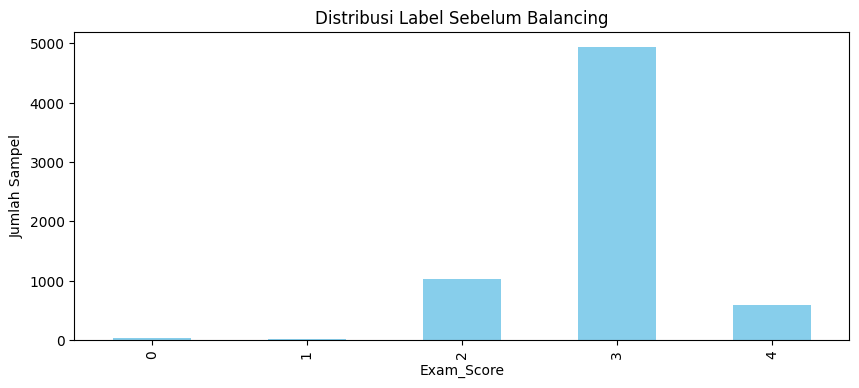

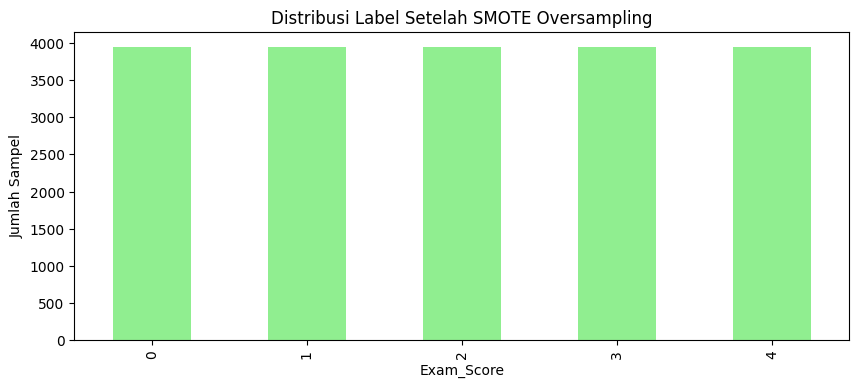

In [12]:


# Sebelum balancing
plt.figure(figsize=(10,4))
df['Exam_Score'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribusi Label Sebelum Balancing")
plt.xlabel("Exam_Score")
plt.ylabel("Jumlah Sampel")
plt.show()

# Sesudah SMOTE
plt.figure(figsize=(10,4))
pd.Series(y_over).value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title("Distribusi Label Setelah SMOTE Oversampling")
plt.xlabel("Exam_Score")
plt.ylabel("Jumlah Sampel")
plt.show()
